In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.0005
training_epochs = 500
display_step = 10

In [3]:
# Training Data
train_X = numpy.asarray([1,2,4,3,5])
train_Y = numpy.asarray([1,3,3,2,5])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(tf.constant(0.0), name="weight")
b = tf.Variable(tf.constant(0.0), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0010 cost= 4.290998459 W= 0.0485945 b= 0.0136148
Epoch: 0020 cost= 3.838841200 W= 0.0943931 b= 0.0264548
Epoch: 0030 cost= 3.437181473 W= 0.137557 b= 0.0385645
Epoch: 0040 cost= 3.080378056 W= 0.178236 b= 0.0499859
Epoch: 0050 cost= 2.763422012 W= 0.216575 b= 0.0607586
Epoch: 0060 cost= 2.481863737 W= 0.252708 b= 0.0709198
Epoch: 0070 cost= 2.231750488 W= 0.286761 b= 0.0805048
Epoch: 0080 cost= 2.009568214 W= 0.318854 b= 0.0895465
Epoch: 0090 cost= 1.812199950 W= 0.3491 b= 0.0980763
Epoch: 0100 cost= 1.636874437 W= 0.377605 b= 0.106124
Epoch: 0110 cost= 1.481128097 W= 0.404469 b= 0.113716
Epoch: 0120 cost= 1.342775702 W= 0.429786 b= 0.12088
Epoch: 0130 cost= 1.219874620 W= 0.453646 b= 0.12764
Epoch: 0140 cost= 1.110698700 W= 0.476132 b= 0.134019
Epoch: 0150 cost= 1.013715386 W= 0.497323 b= 0.140039
Epoch: 0160 cost= 0.927563310 W= 0.517294 b= 0.145721
Epoch: 0170 cost= 0.851032913 W= 0.536114 b= 0.151083
Epoch: 0180 cost= 0.783049941 W= 0.55385 b= 0.156146
Epoch: 0190 cost= 0.72

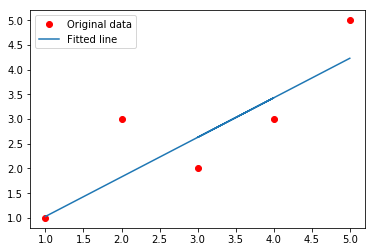

In [8]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
